# Walmart 

Walmart is an American multinational retail corporation that operates a chain of supercenters, discount departmental stores, and grocery stores from the United States. Walmart has more than 100 million customers worldwide.


**Business Problem:**
The Management team at Walmart Inc. wants to analyze the customer purchase behavior (specifically, purchase amount) against the customer’s gender and the customer's marital_status to help the business make better decisions. They want to understand if the spending habits differ between male and female customers: Do women spend more on Black Friday than men? (Assume 50 million customers are male and 50 million are female)

In [1]:
# importing libraries
import pandas as pd
import numpy as np

#importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

#importing statistical library
from scipy.stats import norm

import warnings 
warnings.filterwarnings("ignore")


In [2]:
# loading the walmart data
df = pd.read_csv("walmart_data.txt")
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [3]:
# showing rows and columns
df.shape

(550068, 10)

In [4]:
# checking null values
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [5]:
df.Marital_Status.value_counts()

Marital_Status
0    324731
1    225337
Name: count, dtype: int64

In [6]:
# counting the unique values in each feature
for i in df.columns:
    print(f"{i}:{df[i].nunique()}")
    print("-"*100)

User_ID:5891
----------------------------------------------------------------------------------------------------
Product_ID:3631
----------------------------------------------------------------------------------------------------
Gender:2
----------------------------------------------------------------------------------------------------
Age:7
----------------------------------------------------------------------------------------------------
Occupation:21
----------------------------------------------------------------------------------------------------
City_Category:3
----------------------------------------------------------------------------------------------------
Stay_In_Current_City_Years:5
----------------------------------------------------------------------------------------------------
Marital_Status:2
----------------------------------------------------------------------------------------------------
Product_Category:20
----------------------------------------------------

In [7]:
df.Gender.value_counts()

Gender
M    414259
F    135809
Name: count, dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype 
---  ------                      --------------   ----- 
 0   User_ID                     550068 non-null  int64 
 1   Product_ID                  550068 non-null  object
 2   Gender                      550068 non-null  object
 3   Age                         550068 non-null  object
 4   Occupation                  550068 non-null  int64 
 5   City_Category               550068 non-null  object
 6   Stay_In_Current_City_Years  550068 non-null  object
 7   Marital_Status              550068 non-null  int64 
 8   Product_Category            550068 non-null  int64 
 9   Purchase                    550068 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 42.0+ MB


<Axes: xlabel='Purchase', ylabel='Density'>

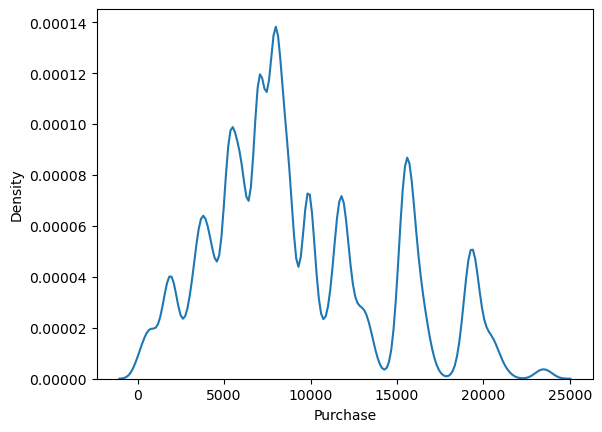

In [9]:
# kde plot for purchase feature
sns.kdeplot(data=df, x = "Purchase")

In [10]:
df.groupby("Marital_Status")["Gender"].value_counts()

Marital_Status  Gender
0               M         245910
                F          78821
1               M         168349
                F          56988
Name: count, dtype: int64

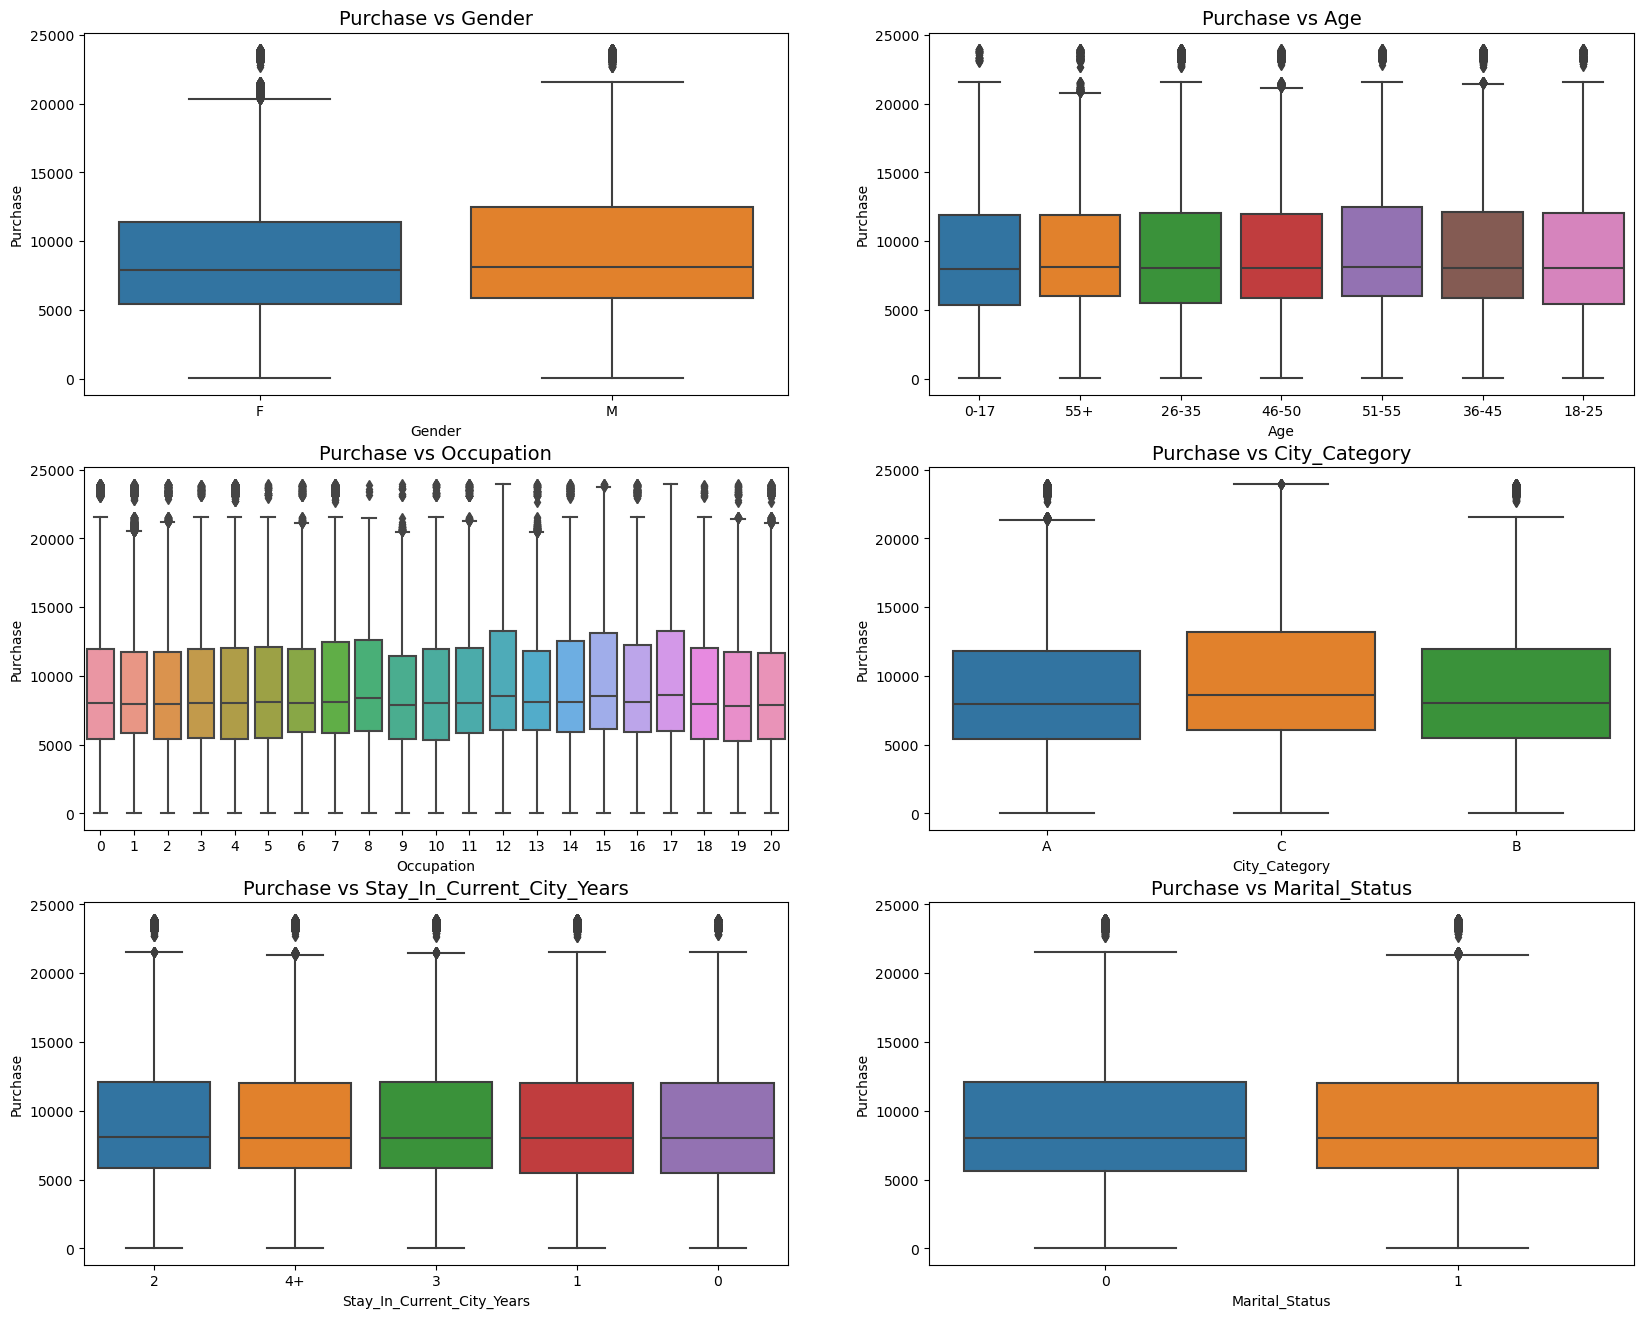

In [11]:
# ploting the boxplots
feature = ["Gender", "Age", "Occupation", "City_Category", "Stay_In_Current_City_Years", "Marital_Status"]
fig,axs = plt.subplots(nrows=3, ncols = 2, figsize= (20,16))
count = 0

for row in range(3):
    for col in range(2):
        sns.boxplot(data=df, y="Purchase", x = feature[count], ax = axs[row, col])
        axs[row, col].set_title(f"Purchase vs {feature[count]}", fontsize = 14)
        count+=1
plt.show()

**Insights:**

1. From the data, we can say males spend more than females.
2. Spending power with respect to age is almost similar.
3. In the Occupation vs Purchase graph, their distribution looks more or less similar.
4. City_Category - "C" spends more than the other two city_categories.
5. In the Purchase vs Stay_In_Current_City_Years graph, their distribution looks almost less similar.
6. Married and Unmarries spending behaviour seems almost similar.
   

# Objective:

We have draw the inferences for the whole population from the given dataset:
 - Need to Check whether males spends more than females or viceversa
 - Need to check, does marital_status affects the spending power of the customers

In [12]:
# checking outliers 
q1 = df["Purchase"].quantile(0.25)
q3 = df["Purchase"].quantile(0.75)
IQR = q2-q1
outliers = df[(df.Purchase < (q1-1.5*IQR)) | (df.Purchase > (q3 + 1.5*IQR))]
print("Percntage of Outlier :", (len(outliers)/len(df))*100)

NameError: name 'q2' is not defined

**Insights:**

1. Removing the outliers from the data as those are a very few in the data

In [ ]:
# updated dataframe, devoid of outliers
df_new = df[(df.Purchase > (q1 - 1.5*IQR)) & (df.Purchase < (q3 + 1.5*IQR))]
df_new.shape

In [ ]:
# showing percentage of each unique_value from the features
categorical_cols = ['Gender', 'Age', 'Stay_In_Current_City_Years', 'Marital_Status','City_Category']
df_new[categorical_cols].melt().groupby(['variable', 'value'])[['value']].count()*100/len(df)

In [ ]:

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))
sns.countplot(data=df_new, x='Gender', ax=axs[0,0])
sns.countplot(data=df_new, x='Age', ax=axs[0,1])
sns.countplot(data=df_new, x='City_Category', ax=axs[1,0])
sns.countplot(data = df_new, x='Marital_Status', ax=axs[1,1])
plt.show()


**Insights:**

1. Proportion of male population is much higher than females in the given dataset.
2. In the Age Category - customers who are under the age of 26 to 35 are lage in numbers in comparison to other age categories.
3. City_category - "B" are highest in proportion.
4. Unmarried People are more than the married people in the given dataset.

In [ ]:
# 
# Convert the columns to string or categorical so the seaborn lib does not throw error
df_new['Product_Category'] = df_new['Product_Category'].astype(str)
df_new['Marital_Status'] = df_new['Marital_Status'].astype(str)

df_new['Age'] = df_new['Age'].astype(str)

In [ ]:
sns.barplot(data=df_new, x= 'Age', y='Purchase', hue= "Marital_Status")

**Insights:**

1. Male population in each age category is more than female population.

In [ ]:
plt.figure(figsize=(10, 8))
sns.countplot(data=df_new, x='Product_Category')
plt.show()

**Insights**

1. Product category - 1, 5 and 8 are large in prportion in comparison to other product categories.

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df_new, x='Age',hue='Marital_Status')
plt.show()

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(data=df_new, x='Product_Category',hue='Marital_Status')
plt.show()

In [ ]:
sns.displot(x='Purchase', bins=25, kde=True,hue='Gender', data=df_new )

In [ ]:
sns.displot(x='Purchase', data=df_new, bins=25, hue='Gender')

plt.axvline(x=df_new['Purchase'].mean(), color='r')
plt.axvline(x=df_new[df_new['Gender']=='M']['Purchase'].mean(), color='b')
plt.axvline(x=df_new[df_new['Gender']=='F']['Purchase'].mean(), color='g')

plt.show()

In [ ]:
# partisan the data between male and female
male = df_new[df_new.Gender == "M"]
male.head()


In [ ]:
male.shape

In [ ]:
# kde plot for male population
sns.kdeplot(male["Purchase"])
plt.show()

In [ ]:
male_samples = []
np.random.seed(42)  # Fixing the seed for reproducibility
for i in range(1000):
    male_sample = np.random.choice(male["Purchase"], size = 50)
    male_samples.append(male_sample.mean())

sns.kdeplot(male_samples)
plt.show()
print(np.mean(male_samples))
print(male["Purchase"].mean())
print(male["Purchase"].std())
    
    

In [ ]:
# contructing 95% confidence interval for male purchases
def cal_CI(mean, sigma, confidence, sample_size):
    slice = (1 - confidence)/2
    std_error = sigma/(np.sqrt(sample_size))
    z1 = norm.ppf(slice)
    x1 = mean + z1*std_error
    
    z2 = norm.ppf(1-slice)
    x2 = mean + z2*std_error
    return (x1,x2)
    


In [ ]:
cal_CI(np.mean(male_samples), male["Purchase"].std(), 0.95, 50)

In [ ]:
female = df_new[df_new.Gender == "F"]
female.head()

In [ ]:
female_samples = []
np.random.seed(42)  # Fixing the seed for reproducibility
for i in range(1000):
    female_sample = np.random.choice(female["Purchase"], size = 50)
    female_samples.append(female_sample.mean())

sns.kdeplot(female_samples)
plt.show()
print(np.mean(female_samples))
print(female["Purchase"].mean())
print(female["Purchase"].std())
    

In [ ]:
cal_CI(np.mean(female_samples), female["Purchase"].std(), 0.95, 50)

**Insights:** 


1. Confidence Interval range for male purchase is [7968.64 to 10745.56] at 95% confidence (sample size = 50).
 
2. Confidence Interval range for female purchase is [7410.66 to 10004.55] at 95% confidence (sample size = 50).

3. As we can see both intervals are colliding, thereby we can not draw inferences for population to conclude that males spend more than females or viceversa on Black Friday.


Lets increase the sample size,


In [ ]:
# increasing the sample size
male_samples = []
np.random.seed(42)  # Fixing the seed for reproducibility
for i in range(1000):
    male_sample = np.random.choice(male["Purchase"], size = 300)
    male_samples.append(male_sample.mean())

sns.kdeplot(male_samples)
plt.show()
print(np.mean(male_samples))
print(male["Purchase"].mean())
print(male["Purchase"].std())
    

In [ ]:
cal_CI(np.mean(male_samples), male["Purchase"].std(), 0.95, 300)

In [ ]:
female_samples = []
np.random.seed(42)  # Fixing the seed for reproducibility
for i in range(1000):
    female_sample = np.random.choice(female["Purchase"], size = 300)
    female_samples.append(female_sample.mean())

sns.kdeplot(female_samples)
plt.show()
print(np.mean(female_samples))
print(female["Purchase"].mean())
print(female["Purchase"].std())

In [ ]:
cal_CI(np.mean(female_samples), female["Purchase"].std(), 0.95, 300)

**Insights:** 

1. Confidence Interval range for male purchase is [8800.63 to 9934.30] at 95% confidence (sample size=300).
2. Confidence Interval range for female purchase is [8135.76 to 9194.71] at 95% confidence (sample size=300).
3.  As we can see both intervals are still colliding, thereby we can not draw inferences for population to conclude that males spend more than females or viceversa on Black Friday.


Again, increase the sample size

In [ ]:
# increasing the sample size
male_samples = []
np.random.seed(42)  # Fixing the seed for reproducibility
for i in range(1000):
    male_sample = np.random.choice(male["Purchase"], size = 800)
    male_samples.append(male_sample.mean())

sns.kdeplot(male_samples)
plt.show()
print(np.mean(male_samples))
print(male["Purchase"].mean())
print(male["Purchase"].std())

In [ ]:
cal_CI(np.mean(male_samples), male["Purchase"].std(), 0.95, 800)

In [ ]:
female_samples = []
np.random.seed(42)  # Fixing the seed for reproducibility
for i in range(1000):
    female_sample = np.random.choice(female["Purchase"], size = 800)
    female_samples.append(female_sample.mean())

sns.kdeplot(female_samples)
plt.show()
print(np.mean(female_samples))
print(female["Purchase"].mean())
print(female["Purchase"].std())

In [ ]:
cal_CI(np.mean(female_samples), female["Purchase"].std(), 0.95, 800)

**Insights:** 

1. Confidence Interval range for male purchase is [9018.90 to 9713.14] at 95% confidence (sample size=800).
2. Confidence Interval range for female purchase is [8345.85 to 8994.33] at 95% confidence (sample size=800).
3. **As we can see both intervals are distinct , therefore we can conclude for whole populationat 95% confidence that male population spends more than female population on black friday.**



# Spending power behaviour of customers with respect to marital status

In [ ]:
married_people = df[df.Marital_Status == 1]
married_people.head()

In [ ]:
married_samples = []
np.random.seed(42)  # Fixing the seed for reproducibility
for i in range(1000):
    married_sample = np.random.choice(married_people["Purchase"], size = 50)
    married_samples.append(married_sample.mean())

plt.hist(married_samples)
plt.show()
print(np.mean(married_samples))
print(married_people["Purchase"].mean())
print(married_people["Purchase"].std())
    
    

In [ ]:
# calling function cal_CI to caculate confidence interval
cal_CI(np.mean(married_samples), married_people["Purchase"].std(), 0.95, 50)


In [ ]:
unmarried_people = df[df.Marital_Status == 0]
unmarried_people.head()

In [ ]:
unmarried_samples = []
np.random.seed(42)  # Fixing the seed for reproducibility
for i in range(1000):
    unmarried_sample = np.random.choice(unmarried_people["Purchase"], size = 50)
    unmarried_samples.append(unmarried_sample.mean())

plt.hist(unmarried_samples)
plt.show()
print(np.mean(male_samples))
print(unmarried_people["Purchase"].mean())
print(unmarried_people["Purchase"].std())
    
    

In [ ]:
# calling function cal_CI to caculate confidence interval
cal_CI(np.mean(unmarried_samples), unmarried_people["Purchase"].std(), 0.95, 50)


**Insights:**

1. Confidence Interval range for married_people purchase is [7862.64, 10643.81] at 95% confidence.
2. Confidence Interval range for unmarried_people purchase is [7861.93 to 10648.90] at 95% confidence.
3. The confidence interval range for married and unmarried people is almost same, thereby we can not draw the inferences for the population at 95 % confidence that whether married people spends more or unmarried people spends more.

let's increase the sample size



In [ ]:
cal_CI(np.mean(married_samples), married_people["Purchase"].std(), 0.90, 3000)

In [ ]:
cal_CI(np.mean(unmarried_samples), unmarried_people["Purchase"].std(), 0.90, 3000)

**Insights:**

1. Confidence Interval range for married_people purchase is [9102.56 to 9403.89] at 90% confidence (sample size = 3000).
2. Confidence Interval range for unmarried_people purchase is [9104.44 to 9406.39] at 90% confidence (sample size = 3000).
3. **The confidence interval range for married and unmarried people is almost same, thereby we can not draw the inferences for the population at 90 % confidence that whether married people spends more or unmarried people spends more.**